# ADVANCED STATISTICS PROJECT
Vikram Radhakrishnan

29th March 2020


In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import sys
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In [111]:
df = pd.read_csv('Fever-1.csv')

In [112]:
df.head(5)

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [113]:
df.describe()

,A,B,Volunteer,Relief
count,36.000000,36.000000,36.000000,36.000000
mean,2.000000,2.000000,2.500000,7.183333
std,0.828079,0.828079,1.133893,3.272090
min,1.000000,1.000000,1.000000,2.300000
25%,1.000000,1.000000,1.750000,4.675000
50%,2.000000,2.000000,2.500000,6.000000
75%,3.000000,3.000000,3.250000,9.325000
max,3.000000,3.000000,4.000000,13.500000


### 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [114]:
df.A = pd.Categorical(df.A)
df.Volunteer=pd.Categorical(df.Volunteer)

In [115]:
formula = 'Relief ~ C(A)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


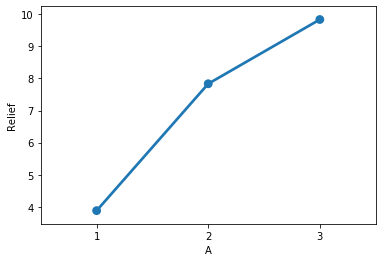

In [116]:
sns.pointplot(x='A', y='Relief', data=df, ci=None) # Effect of A on Relief

### 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [117]:
df.B = pd.Categorical(df.B)

In [118]:
formula = 'Relief ~C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


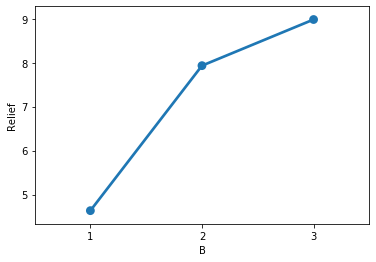

In [119]:
sns.pointplot(x='B', y='Relief', data=df, ci=None)  # Effect of B on Relief

# 1.4) Analyse the effects of one variable on another with the help of an interaction plot. What is an interaction between two treatments? [hint: use the ‘pointplot’ function from the ‘seaborn’ graphical subroutine in Python]

In [120]:
formula = 'Relief ~ C(A):C(B)' # To capture interaction between A & B on sales
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)


             df   sum_sq    mean_sq           F        PR(>F)
C(A):C(B)   8.0  373.105  46.638125  774.910385  7.710504e-30
Residual   27.0    1.625   0.060185         NaN           NaN


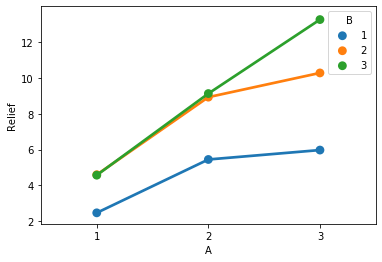

In [121]:
sns.pointplot(x='A', y='Relief', data=df, hue='B', ci=None)

# 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) and state your results.

In [122]:
formula = 'Relief ~ C(A)+C(B)' # To capture interaction between A & B on sales, two-way Anova
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)


            df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN


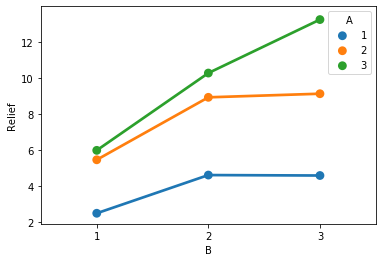

In [123]:
sns.pointplot(x='B', y='Relief', data=df, hue='A', ci=None)

# PROBLEM NUMBER 2


### The dataset Education - Post 12th Standard.csv is a dataset which contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [124]:
df = pd.read_csv('Education - Post 12th Standard-1.csv')

In [125]:
df.head(5)

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [126]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


<Figure size 1080x720 with 0 Axes>

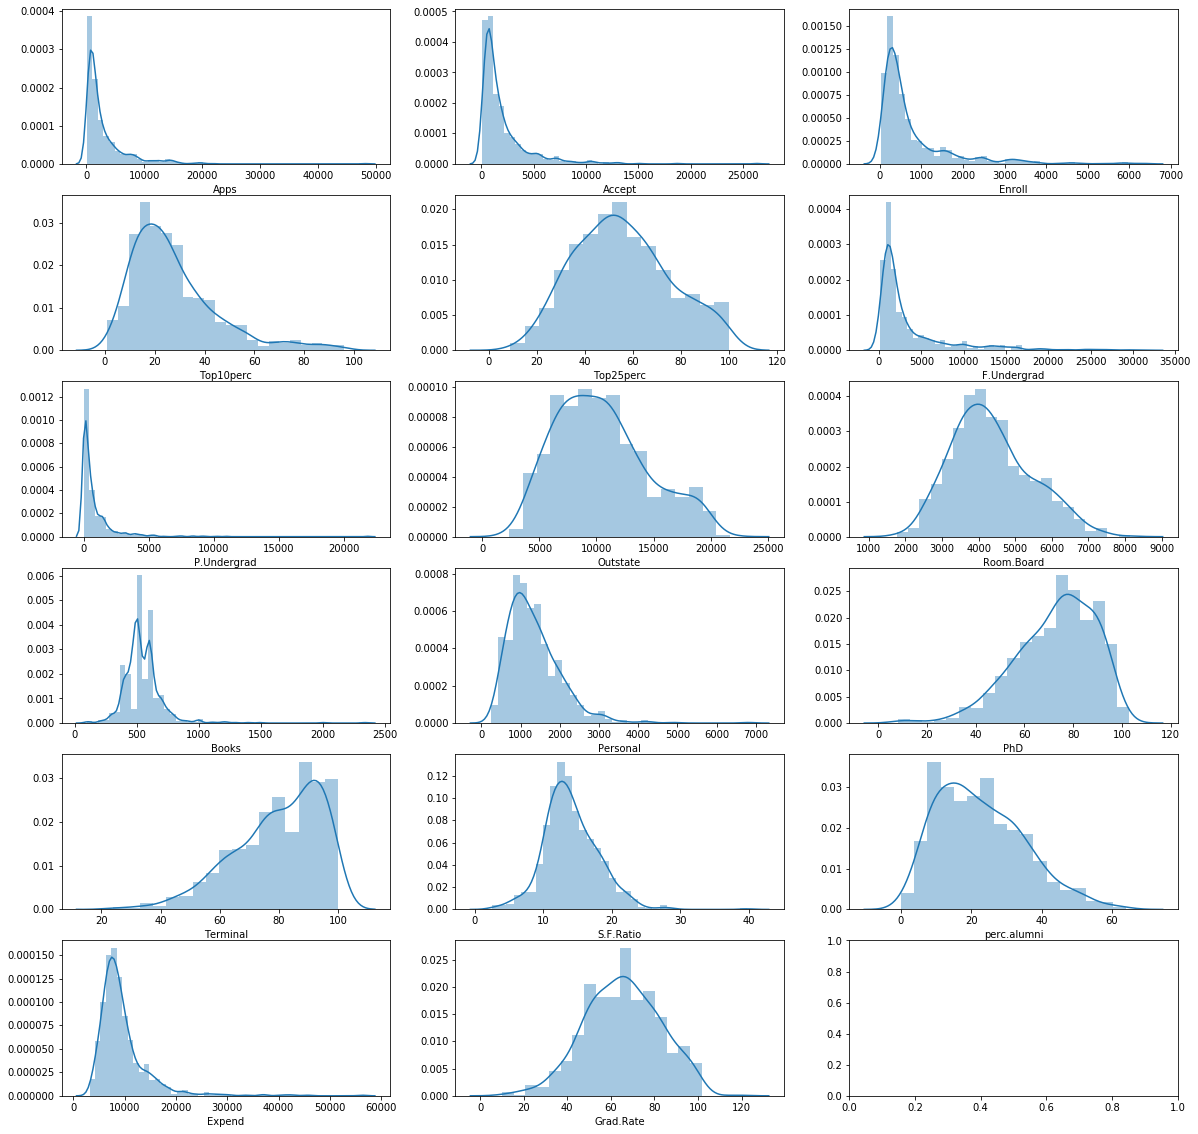

In [127]:
# Plot histogram and distribution to see how data is spread

plt.figure(figsize=(15,10)) # makes the plot wider
fig, axes = plt.subplots(6,3,figsize=(20,20))
sns.distplot(df['Apps'],ax=axes[0,0])
sns.distplot(df['Accept'],ax=axes[0,1])
sns.distplot(df['Enroll'],ax=axes[0,2])
sns.distplot(df['Top10perc'],ax=axes[1,0])
sns.distplot(df['Top25perc'],ax=axes[1,1])
sns.distplot(df['F.Undergrad'],ax=axes[1,2])
sns.distplot(df['P.Undergrad'],ax=axes[2,0])
sns.distplot(df['Outstate'],ax=axes[2,1])
sns.distplot(df['Room.Board'],ax=axes[2,2])
sns.distplot(df['Books'],ax=axes[3,0])
sns.distplot(df['Personal'],ax=axes[3,1])
sns.distplot(df['PhD'],ax=axes[3,2])
sns.distplot(df['Terminal'],ax=axes[4,0])
sns.distplot(df['S.F.Ratio'],ax=axes[4,1])
sns.distplot(df['perc.alumni'],ax=axes[4,2])
sns.distplot(df['Expend'],ax=axes[5,0])
sns.distplot(df['Grad.Rate'],ax=axes[5,1])

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Names          777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.4+ KB


In [129]:
df[df.duplicated()==True].count() # Get the duplicated rows

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [130]:
df.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [131]:
df['Names'].unique()

array(['Abilene Christian University', 'Adelphi University',
       'Adrian College', 'Agnes Scott College',
       'Alaska Pacific University', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alderson-Broaddus College', 'Alfred University',
       'Allegheny College', 'Allentown Coll. of St. Francis de Sales',
       'Alma College', 'Alverno College',
       'American International College', 'Amherst College',
       'Anderson University', 'Andrews University',
       'Angelo State University', 'Antioch University',
       'Appalachian State University', 'Aquinas College',
       'Arizona State University Main campus',
       'Arkansas College (Lyon College)', 'Arkansas Tech University',
       'Assumption College', 'Auburn University-Main Campus',
       'Augsburg College', 'Augustana College IL', 'Augustana College',
       'Austin College', 'Averett College', 'Baker University',
       'Baldwin-Wallace College', 'Barat College', 

In [132]:
df['Names'].isnull().sum() # Check for null values

0

In [133]:
df['Names'] = df['Names'].astype('str') # Convert Obj to Str

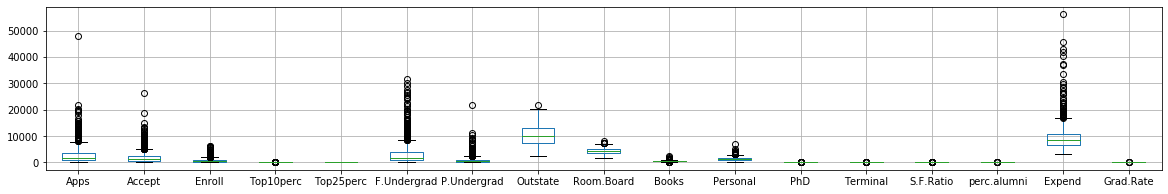

In [134]:
df.boxplot(figsize=(20,3)) # Plot to check for Outliers

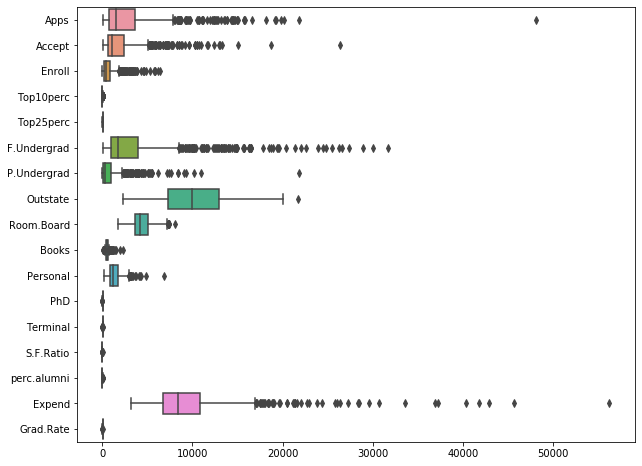

In [135]:
fig, ax = plt.subplots(figsize=(10,8)) # Use SNS for a alternative representation if required
sns.boxplot(data=df,orient="h")

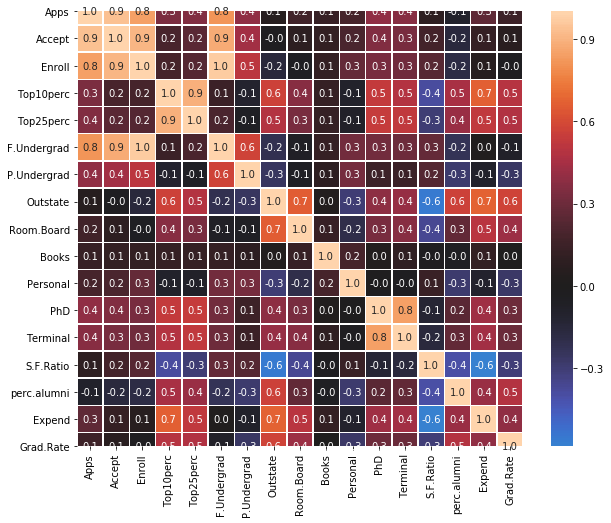

In [136]:
plt.figure(figsize=(10,8))  # Plot correlation heatmap for Bivariate study
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 0 )  # heatmap
plt.show()

# 2.2) Scale the variables and write the inference for using the type of scaling function for this case study.

In [137]:
new=df.drop(['Names'],axis=1) # Drop the non-numerical columns


In [138]:
# ** THREE TYPES OF SCALING ARE EXPLORED **


# Scaling Type 1 - Z Score

from scipy.stats import zscore # Compute the Z-Score for all columns
ztest=new.apply(zscore)
ztest.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02
mean,6.355797e-17,6.774575e-17,-5.249269e-17,-2.753232e-17,-1.546739e-16,-1.661405e-16,-3.029180e-17,6.515595e-17,3.570717e-16,-2.192583e-16,4.765243e-17,5.954768e-17,-4.481615e-16,-2.057556e-17,-6.022638e-17,1.213101e-16,3.886495e-16
std,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00
min,-7.551337e-01,-7.947645e-01,-8.022728e-01,-1.506526e+00,-2.364419e+00,-7.346169e-01,-5.615022e-01,-2.014878e+00,-2.351778e+00,-2.747779e+00,-1.611860e+00,-3.962596e+00,-3.785982e+00,-2.929799e+00,-1.836580e+00,-1.240641e+00,-3.230876e+00
25%,-5.754408e-01,-5.775805e-01,-5.793514e-01,-7.123803e-01,-7.476067e-01,-5.586426e-01,-4.997191e-01,-7.762035e-01,-6.939170e-01,-4.810994e-01,-7.251203e-01,-6.532948e-01,-5.915023e-01,-6.546598e-01,-7.868237e-01,-5.574826e-01,-7.260193e-01
50%,-3.732540e-01,-3.710108e-01,-3.725836e-01,-2.585828e-01,-9.077663e-02,-4.111378e-01,-3.301442e-01,-1.120949e-01,-1.437297e-01,-2.992802e-01,-2.078552e-01,1.433889e-01,1.561419e-01,-1.237939e-01,-1.408197e-01,-2.458933e-01,-2.698956e-02
75%,1.609122e-01,1.654173e-01,1.314128e-01,4.221134e-01,6.671042e-01,6.294077e-02,7.341765e-02,6.179271e-01,6.318245e-01,3.067838e-01,5.310950e-01,7.562224e-01,8.358184e-01,6.093067e-01,6.666852e-01,2.241735e-01,7.302926e-01
max,1.165867e+01,9.924816e+00,6.043678e+00,3.882319e+00,2.233391e+00,5.764674e+00,1.378992e+01,2.800531e+00,3.436593e+00,1.085230e+01,8.068387e+00,1.859323e+00,1.379560e+00,6.499390e+00,3.331452e+00,8.924721e+00,3.060392e+00


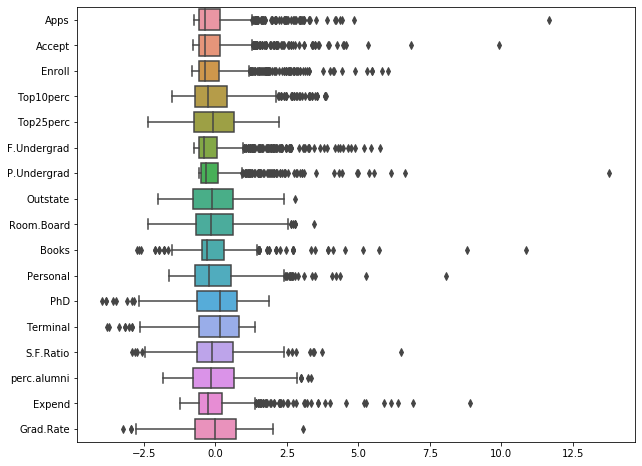

In [139]:
fig, ax = plt.subplots(figsize=(10,8)) # Boxplot of Z Scores of all Variables
sns.boxplot(data=ztest,orient="h")

In [140]:
# Scaling type II - Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
minmax_scale

MinMaxScaler(copy=True, feature_range=(0, 1))

In [141]:
test = minmax_scale.fit_transform(new)

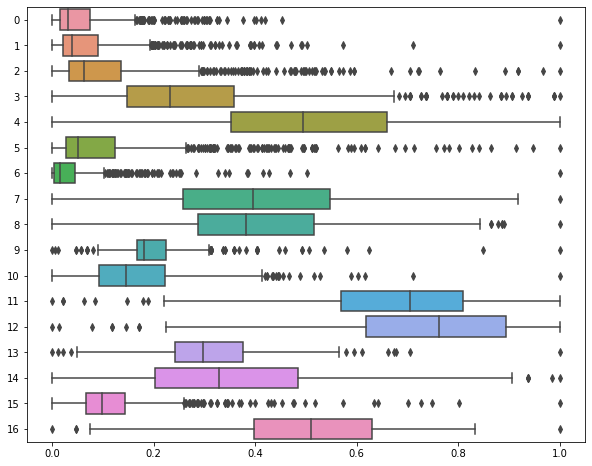

In [142]:
fig, ax = plt.subplots(figsize=(10,8)) # Boxplot of MinMax scale of all Variables
sns.boxplot(data=test,orient="h")

In [143]:
### Scaling type 3 - Log Scaling

from sklearn.preprocessing import FunctionTransformer   
log_transformer = FunctionTransformer(np.log1p)
log_transformer

FunctionTransformer(accept_sparse=False, check_inverse=True,
                    func=<ufunc 'log1p'>, inv_kw_args=None, inverse_func=None,
                    kw_args=None, pass_y='deprecated', validate=None)

In [144]:
logtest= log_transformer.fit_transform(new) 

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


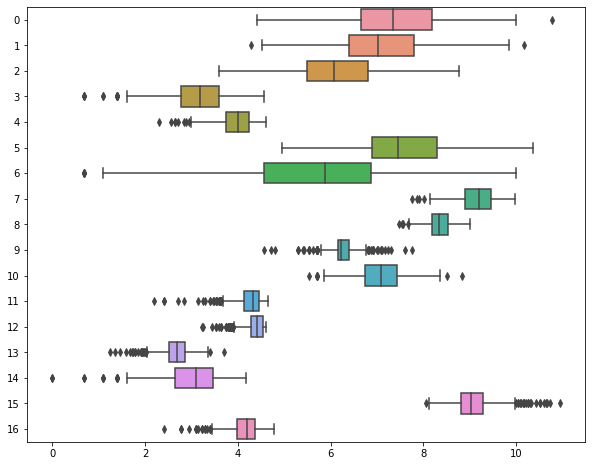

In [145]:
fig, ax = plt.subplots(figsize=(10,8)) # Boxplot of Log scale of all Variables
sns.boxplot(data=logtest,orient="h")

# 2.3) Comment on the comparison between covariance and the correlation matrix after scaling.

In [146]:
logtest=pd.DataFrame(data=logtest)
logcov=logtest.cov()
logcov

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.150834,1.034960,0.944139,0.210668,0.149145,0.976693,0.654006,0.018897,0.051068,0.049221,0.099977,0.137314,0.102779,0.034481,-0.035803,0.109431,0.057879
1,1.034960,0.978004,0.891444,0.155710,0.115406,0.919713,0.673849,0.001479,0.033286,0.037308,0.099641,0.119992,0.089319,0.047014,-0.050671,0.070556,0.040925
2,0.944139,0.891444,0.904538,0.130672,0.098242,0.939110,0.753054,-0.058606,-0.002523,0.038268,0.128289,0.102790,0.074926,0.063282,-0.090514,0.028876,0.015227
3,0.210668,0.155710,0.130672,0.394082,0.216402,0.109577,-0.247050,0.121473,0.050203,0.018635,-0.026981,0.085439,0.058264,-0.063892,0.161251,0.151744,0.085267
4,0.149145,0.115406,0.098242,0.216402,0.146720,0.093984,-0.106484,0.064399,0.029503,0.012413,-0.013491,0.051410,0.039059,-0.029709,0.090340,0.079714,0.050096
5,0.976693,0.919713,0.939110,0.109577,0.093984,1.054200,0.957586,-0.087968,-0.006639,0.042855,0.152515,0.105129,0.076572,0.081981,-0.142058,0.006560,0.003452
6,0.654006,0.673849,0.753054,-0.247050,-0.106484,0.957586,2.582959,-0.259776,-0.032396,0.021023,0.262278,0.005893,0.005138,0.150638,-0.425254,-0.211426,-0.118720
7,0.018897,0.001479,-0.058606,0.121473,0.064399,-0.087968,-0.259776,0.164020,0.067824,0.003718,-0.059336,0.029554,0.027802,-0.061504,0.129399,0.117789,0.063064
8,0.051068,0.033286,-0.002523,0.050203,0.029503,-0.006639,-0.032396,0.067824,0.064301,0.009770,-0.026069,0.017967,0.018317,-0.026179,0.041834,0.058890,0.029846
9,0.049221,0.037308,0.038268,0.018635,0.012413,0.042855,0.021023,0.003718,0.009770,0.073016,0.024246,0.000651,0.005943,-0.003346,-0.003389,0.016330,-0.001089


In [147]:
logcorr=logtest.corr(method='pearson')

In [148]:
logcorr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.000000,0.975544,0.925371,0.312823,0.362959,0.886727,0.379330,0.043495,0.187728,0.169800,0.192081,0.460050,0.459050,0.116573,-0.054482,0.249690,0.183893
1,0.975544,1.000000,0.947786,0.250815,0.304659,0.905775,0.423969,0.003693,0.132732,0.139612,0.207662,0.436090,0.432751,0.172419,-0.083644,0.174635,0.141047
2,0.925371,0.947786,1.000000,0.218865,0.269675,0.961704,0.492668,-0.152153,-0.010461,0.148907,0.278012,0.388449,0.377467,0.241321,-0.155362,0.074317,0.054571
3,0.312823,0.250815,0.218865,1.000000,0.899961,0.170006,-0.244869,0.477793,0.315374,0.109857,-0.088582,0.489167,0.444703,-0.369133,0.419325,0.591681,0.462955
4,0.362959,0.304659,0.269675,0.899961,1.000000,0.238973,-0.172975,0.415133,0.303751,0.119928,-0.072591,0.482389,0.488583,-0.281302,0.385015,0.509402,0.445768
5,0.886727,0.905775,0.961704,0.170006,0.238973,1.000000,0.580307,-0.211550,-0.025498,0.154465,0.306153,0.368009,0.357333,0.289586,-0.225863,0.015639,0.011458
6,0.379330,0.423969,0.492668,-0.244869,-0.172975,0.580307,1.000000,-0.399110,-0.079492,0.048409,0.336350,0.013178,0.015318,0.339939,-0.431948,-0.322008,-0.251778
7,0.043495,0.003693,-0.152153,0.477793,0.415133,-0.211550,-0.399110,1.000000,0.660432,0.033974,-0.301964,0.262276,0.328921,-0.550781,0.521586,0.711907,0.530747
8,0.187728,0.132732,-0.010461,0.315374,0.303751,-0.025498,-0.079492,0.660432,1.000000,0.142583,-0.211887,0.254660,0.346098,-0.374431,0.269319,0.568460,0.401167
9,0.169800,0.139612,0.148907,0.109857,0.119928,0.154465,0.048409,0.033974,0.142583,1.000000,0.184932,0.008663,0.105385,-0.044905,-0.020473,0.147929,-0.013740


# 2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.	

<Figure size 1080x720 with 0 Axes>

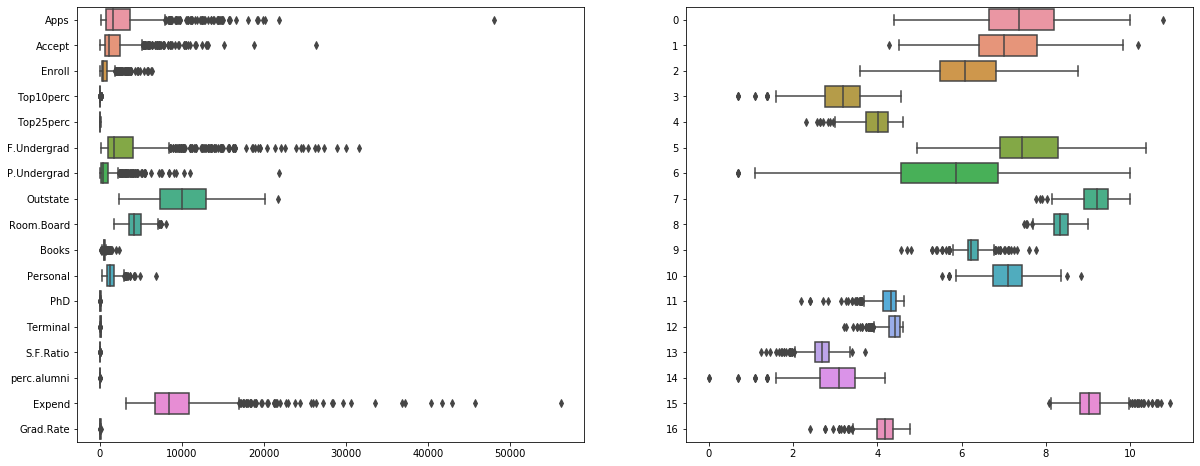

In [149]:
plt.figure(figsize=(15,10)) # makes the plot wider
fig, axes = plt.subplots(1,2,figsize=(20,8))
sns.boxplot(data=new,ax=axes[0],orient="h")
sns.boxplot(data=logtest,ax=axes[1],orient="h")

# 2.5) Build the covariance matrix and calculate the eigenvalues and the eigenvector.	

In [150]:
cov_matrix = np.cov(new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.49784595e+07  8.94985981e+06  3.04525599e+06  2.31327731e+04
   2.69526635e+04  1.52897025e+07  2.34662015e+06  7.80970356e+05
   7.00072872e+05  8.47037526e+04  4.68346833e+05  2.46894337e+04
   2.10530676e+04  1.46506058e+03 -4.32712238e+03  5.24617110e+06
   9.75642164e+03]
 [ 8.94985981e+06  6.00795970e+06  2.07626776e+06  8.32112487e+03
   1.20134048e+04  1.03935824e+07  1.64666972e+06 -2.53962285e+05
   2.44347147e+05  4.59428079e+04  3.33556631e+05  1.42382015e+04
   1.21820938e+04  1.70983819e+03 -4.85948702e+03  1.59627169e+06
   2.83416292e+03]
 [ 3.04525599e+06  2.07626776e+06  8.63368392e+05  2.97158341e+03
   4.17259244e+03  4.34752988e+06  7.25790674e+05 -5.81188483e+05
  -4.09970592e+04  1.72911997e+04  1.76737970e+05  5.02896117e+03
   4.21708603e+03  8.72684773e+02 -2.08169379e+03  3.11345431e+05
  -3.56587977e+02]
 [ 2.31327731e+04  8.32112487e+03  2.97158341e+03  3.11182456e+02
   3.11630480e+02  1.20891137e+04 -2.82947498e+03  3.99071798e+

In [151]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 5.57026265e-01  3.93606986e-02 -1.67353250e-01 -6.64271177e-01
  -1.64686863e-01 -5.80500092e-02 -1.34342602e-01  4.11793520e-01
  -2.74068846e-02 -3.76034135e-03 -4.38857450e-03  3.02180551e-03
   5.30739374e-04  4.00796357e-04 -1.86846892e-04  5.88553549e-04
  -1.12791915e-03]
 [ 3.47711968e-01  7.71620231e-02 -1.62363494e-01 -2.32927268e-01
  -5.80585150e-03 -6.02807211e-02  2.39957336e-01 -8.41806975e-01
   1.49989709e-01  5.82362196e-03  8.23337143e-03 -5.36725416e-03
  -1.75963534e-03  1.07556459e-03  2.32571906e-04 -1.25067011e-03
   2.47359512e-03]
 [ 1.29854039e-01  4.54128642e-02 -9.66343352e-03  5.88323506e-02
   6.40769269e-02 -2.13069540e-02  4.08911751e-02 -1.18368499e-01
  -9.78309623e-01 -7.72030365e-03 -7.08566943e-03  6.92580554e-03
  -1.31713816e-03 -3.49723514e-03  6.24356491e-05  2.61866683e-03
  -3.10201851e-03]
 [ 1.02538882e-03 -1.70554150e-03 -1.31447376e-04 -1.22540877e-04
   1.79736891e-03 -8.03697029e-04 -1.89841825e-03  7.49048980e-03
 

# 2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).

In [152]:
# Explicit form of first PC in terms of Eigen Vectors

In [153]:
print(eig_vecs[0].round(3))

[ 0.557  0.039 -0.167 -0.664 -0.165 -0.058 -0.134  0.412 -0.027 -0.004
 -0.004  0.003  0.001  0.    -0.     0.001 -0.001]


# 2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame

In [154]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]

var_exp # Principal components

[46.35921747596845,
 40.723130124692666,
 6.726856181551859,
 3.1437523507327154,
 1.5534401168849343,
 0.6693494401194974,
 0.4012905048773119,
 0.35236183472144855,
 0.04231296545211106,
 0.027270591587771866,
 0.0004590946771688138,
 0.00022572711452813904,
 0.0001695370426492258,
 8.713852539458219e-05,
 3.875975066593933e-05,
 2.9066829652562785e-05,
 9.089471182084042e-06]

In [155]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 46.35921748  87.0823476   93.80920378  96.95295613  98.50639625
  99.17574569  99.57703619  99.92939803  99.971711    99.99898159
  99.99944068  99.99966641  99.99983595  99.99992308  99.99996184
  99.99999091 100.        ]


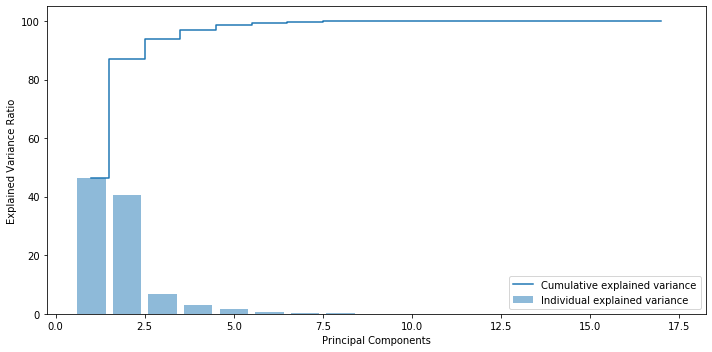

In [156]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [157]:
dfr = pd.DataFrame(eig_vecs,columns=list(new))


In [158]:
dfr.round(2)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.56,0.04,-0.17,-0.66,-0.16,-0.06,-0.13,0.41,-0.03,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00
1,0.35,0.08,-0.16,-0.23,-0.01,-0.06,0.24,-0.84,0.15,0.01,0.01,-0.01,-0.00,0.00,0.00,-0.00,0.00
2,0.13,0.05,-0.01,0.06,0.06,-0.02,0.04,-0.12,-0.98,-0.01,-0.01,0.01,-0.00,-0.00,0.00,0.00,-0.00
3,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.01,-0.01,0.00,0.44,-0.26,-0.29,-0.05,0.01,-0.34,0.74
4,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.01,-0.00,0.01,0.62,-0.34,-0.38,-0.05,0.00,0.28,-0.52
5,0.67,0.28,0.02,0.58,0.28,0.09,-0.01,0.15,0.14,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00
6,0.11,0.08,0.07,0.30,-0.92,-0.15,0.10,-0.00,-0.02,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00
7,0.05,-0.57,-0.76,0.25,0.01,-0.17,-0.05,0.04,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00
8,0.03,-0.11,-0.14,-0.01,-0.18,0.96,-0.06,-0.06,-0.03,-0.03,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00
9,0.00,-0.00,0.00,0.00,-0.01,0.02,-0.05,-0.01,-0.01,1.00,-0.00,0.00,0.01,0.00,-0.00,-0.00,-0.00


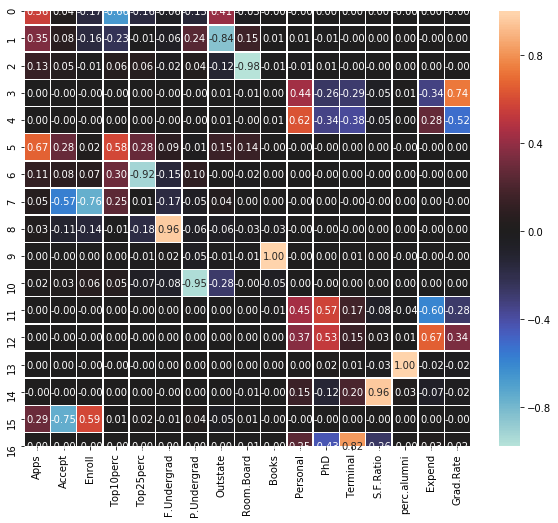

In [159]:
plt.figure(figsize=(10,8))
sns.heatmap(data=dfr, annot=True, linewidths=.5, fmt= '.2f' , center = 0)  # heatmap
plt.show()